In [1]:
%run "Stitching_functions.ipynb"
%run "ClusteringAndPlotting.ipynb"
%load_ext autoreload

Clustering and Plotting loaded


In [2]:
# save original path
try: original_path
except NameError: original_path = os.path.abspath(os.getcwd())

# reset path
os.chdir(original_path)

# change to .ply folder
os.chdir('../data/plyfolder')

# load files
pcds = []

for file in os.listdir():
    if file.split(".")[-1] == "ply":
        pcds.append(o3d.io.read_point_cloud(file))


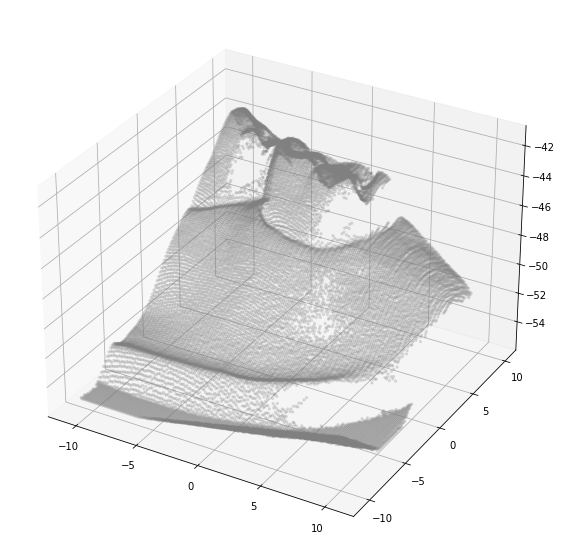

In [15]:
# use voxel filter to filter noise
downpcds = []
for cloud in pcds:
    downpcds.append(removeOutliers(cloud.voxel_down_sample(voxel_size=0.1)))

#o3d.visualization.draw_geometries([downpcd])
plotCloud(downpcds[0], mirrorY = True, mirrorZ = True)

In [20]:
t = 0
list_new_pointclouds = [downpcds[0]]

for i in range(9):
    print("------------------------------------------------------------")
    

    source = list_new_pointclouds[-1]
    target = downpcds[t+1]
    dt_string = "dt_string"
    newpointcloud_last,trasformations_list = stitch_two_point_clouds(source,
                                        target,
                                        "title",
                                        dt_string,
                                        voxel_size =0.1,
                                        calculate_global = True,
                                        calculate_icp = True,
                                        trans_init = None,
                                        pprint_statements = True,
                                        save_statements = False,
                                        visualization_on = False,
                                        final_vis_on = False                                  
                                       )

    list_new_pointclouds.append(newpointcloud_last.voxel_down_sample(voxel_size=0.1))

------------------------------------------------------------
stitching : title

outlier removal

dataset preparation

 Downsample with a voxel size 0.100.
Estimate normal with search radius 0.200.
Compute FPFH feature with search radius 0.500.

 Downsample with a voxel size 0.100.
Estimate normal with search radius 0.200.
Compute FPFH feature with search radius 0.500.


number of points in clouds
(0, 22450)
(1, 23250)

global registration: RANSAC registration on downsampled point clouds.
type result: <class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
Fit is:
<class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
RegistrationResult with fitness=4.371585e-03, inlier_rmse=6.763513e-02, and correspondence_set size of 32
Access transformation to get result.
Transformation is:
[[ 9.99915885e-01  8.56970080e-03 -9.73569672e-03  2.49844309e+00]
 [-8.57015438e-03  9.99963276e-01 -4.87063938e-06 -7.38420182e-02]
 [ 9.73529744e-03  8.83066536e-05  9.99952607e-01 

dataset preparation

 Downsample with a voxel size 0.100.
Estimate normal with search radius 0.200.
Compute FPFH feature with search radius 0.500.

 Downsample with a voxel size 0.100.
Estimate normal with search radius 0.200.
Compute FPFH feature with search radius 0.500.


number of points in clouds
(0, 35124)
(1, 23250)

global registration: RANSAC registration on downsampled point clouds.
type result: <class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
Fit is:
<class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
RegistrationResult with fitness=2.580937e-02, inlier_rmse=2.627189e-04, and correspondence_set size of 114
Access transformation to get result.
Transformation is:
[[ 9.99999996e-01  9.24077329e-05 -1.09985164e-05  1.59556408e-03]
 [-9.24076364e-05  9.99999996e-01  8.77593950e-06 -6.56042261e-04]
 [ 1.09993273e-05 -8.77492311e-06  1.00000000e+00 -1.70710250e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


number of

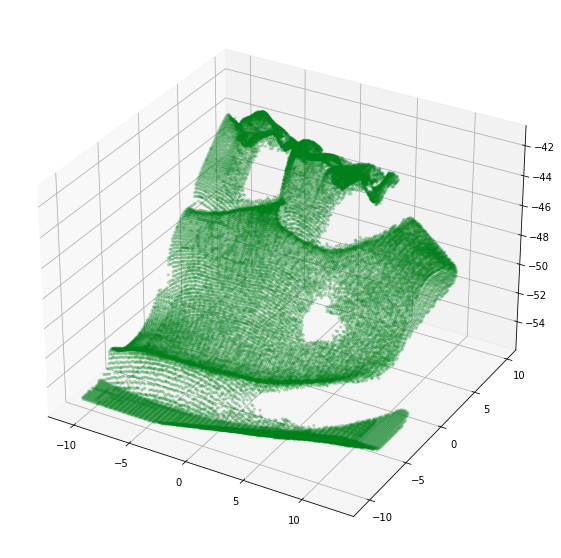

In [21]:
plotCloud(list_new_pointclouds[-1],mirrorY = True, mirrorZ = True)